In [17]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
df = pd.read_csv("C:/Users/shraddha/Downloads/online_course_engagement_data.csv")
df.head()


,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [33]:
# Stage 1: Visited Course Page
df['visited'] = df['TimeSpentOnCourse'].apply(lambda x: 1 if x > 0 else 0)

# Stage 2: Engaged User
df['engaged'] = df['NumberOfVideosWatched'].apply(lambda x: 1 if x > 0 else 0)

# Stage 3: Active Learner
df['active'] = df['NumberOfQuizzesTaken'].apply(lambda x: 1 if x > 0 else 0)

# Stage 4: Achiever (Scored well)
df['achiever'] = df['QuizScores'].apply(lambda x: 1 if x >= 50 else 0)

# Stage 5: Completed Course
df['completed'] = df['CourseCompletion']


In [31]:
df[['visited', 'engaged', 'active', 'achiever', 'completed']].head()


,visited,engaged,active,achiever,completed
0,1,1,1,1,0
1,1,1,1,1,0
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,0,1,0


In [13]:
funnel = {
    "Visited": df['visited'].sum(),
    "Engaged": df['engaged'].sum(),
    "Active Learner": df['active'].sum(),
    "Achiever": df['achiever'].sum(),
    "Completed": df['completed'].sum()
}

funnel_df = pd.DataFrame.from_dict(funnel, orient='index', columns=['Users'])
funnel_df


,Users
Visited,9000
Engaged,8592
Active Learner,8233
Achiever,9000
Completed,3568


In [23]:
funnel_df['Dropoff'] = funnel_df['Users'].shift(1) - funnel_df['Users']
funnel_df


,Users,Dropoff
Visited,9000,NaN
Engaged,8592,408.0
Active Learner,8233,359.0
Achiever,9000,-767.0
Completed,3568,5432.0


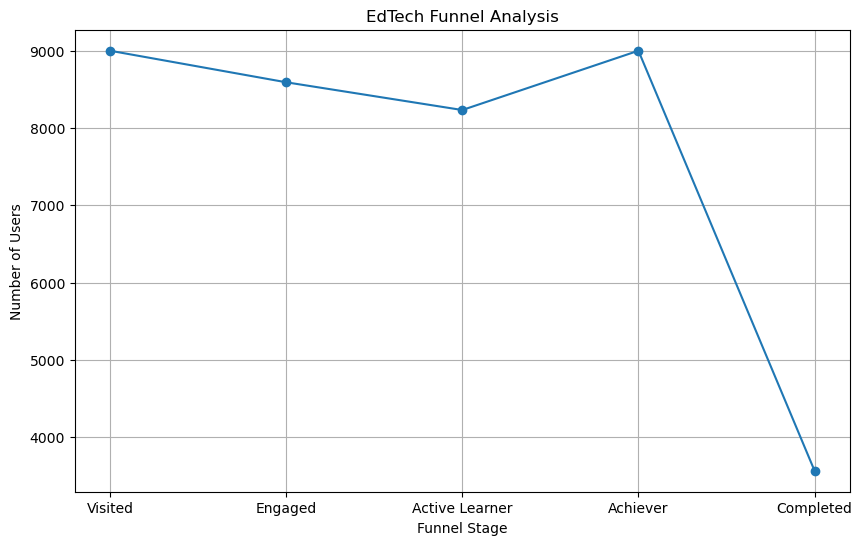

In [25]:
plt.figure(figsize=(10,6))
plt.plot(funnel_df.index, funnel_df['Users'], marker='o')
plt.title("EdTech Funnel Analysis")
plt.xlabel("Funnel Stage")
plt.ylabel("Number of Users")
plt.grid(True)
plt.show()


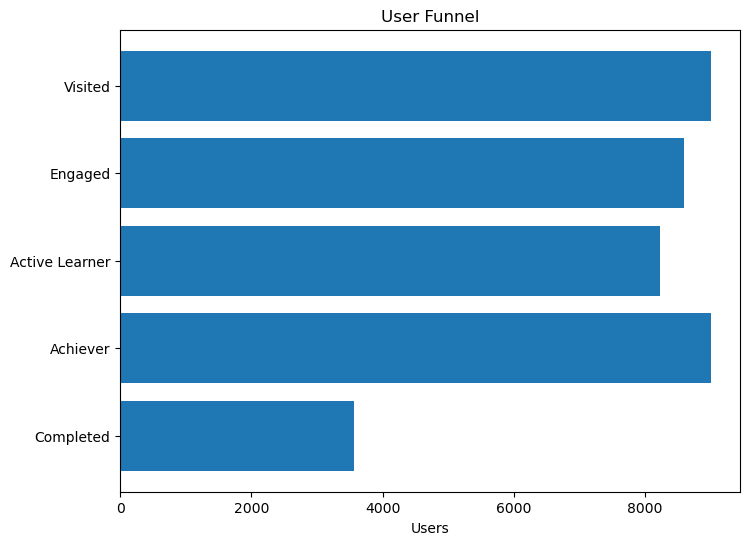

In [27]:
plt.figure(figsize=(8,6))
plt.barh(funnel_df.index[::-1], funnel_df['Users'][::-1])
plt.title("User Funnel")
plt.xlabel("Users")
plt.show()


In [131]:
df['achiever'] = df['QuizScores'].apply(lambda x: 1 if pd.notnull(x) and x >= 50 else 0)


In [41]:
funnel_df['Drop-off'] = funnel_df['Users'].shift(1) - funnel_df['Users']
funnel_df


,Users,Conversion %,Drop-off
Visited,9000,100.00,NaN
Engaged,8592,95.47,408.0
Active Learner,8233,91.48,359.0
Achiever,9000,100.00,-767.0
Completed,3568,39.64,5432.0


In [133]:
# Correct Drop-off
funnel_df['Drop-off'] = funnel_df['Users'].shift(1) - funnel_df['Users']

# Correct Conversion %
funnel_df['Conversion %'] = round((funnel_df['Users'] / funnel_df['Users'].iloc[0]) * 100, 2)

funnel_df


,Users,Conversion %,Drop-off
Visited,9000,100.00,NaN
Engaged,8592,95.47,408.0
Active Learner,8233,91.48,359.0
Achiever,9000,100.00,-767.0
Completed,3568,39.64,5432.0


In [135]:
# View stages with highest drop-off
funnel_df.sort_values(by='Drop-off', ascending=False)



,Users,Conversion %,Drop-off
Completed,3568,39.64,5432.0
Engaged,8592,95.47,408.0
Active Learner,8233,91.48,359.0
Achiever,9000,100.00,-767.0
Visited,9000,100.00,NaN


In [137]:
stages = ['visited', 'engaged', 'active', 'achiever', 'completed']
users_per_stage = df[stages].sum()


In [139]:

funnel = pd.DataFrame({
    'Stage': users_per_stage.index,
    'Users': users_per_stage.values
})

# Drop-off from previous stage
funnel['Drop-off'] = funnel['Users'].shift(1) - funnel['Users']
funnel['Drop-off'] = funnel['Drop-off'].fillna(0)

# Conversion % from first stage
funnel['Conversion %'] = round((funnel['Users'] / funnel['Users'].iloc[0]) * 100, 2)

funnel


,Stage,Users,Drop-off,Conversion %
0,visited,9000,0.0,100.00
1,engaged,8592,408.0,95.47
2,active,8233,359.0,91.48
3,achiever,9000,-767.0,100.00
4,completed,3568,5432.0,39.64


In [141]:
# Create funnel dataframe
funnel = pd.DataFrame({
    'Stage': ['visited', 'engaged', 'active', 'achiever', 'completed'],
    'Users': [df['visited'].sum(), df['engaged'].sum(), df['active'].sum(),
              df['achiever'].sum(), df['completed'].sum()]
})

# Calculate drop-off from previous stage
funnel['Drop-off'] = funnel['Users'].shift(1) - funnel['Users']
funnel['Drop-off'] = funnel['Drop-off'].fillna(0)

# Calculate conversion % from first stage
funnel['Conversion %'] = round((funnel['Users'] / funnel['Users'].iloc[0]) * 100, 2)

funnel



,Stage,Users,Drop-off,Conversion %
0,visited,9000,0.0,100.00
1,engaged,8592,408.0,95.47
2,active,8233,359.0,91.48
3,achiever,9000,-767.0,100.00
4,completed,3568,5432.0,39.64


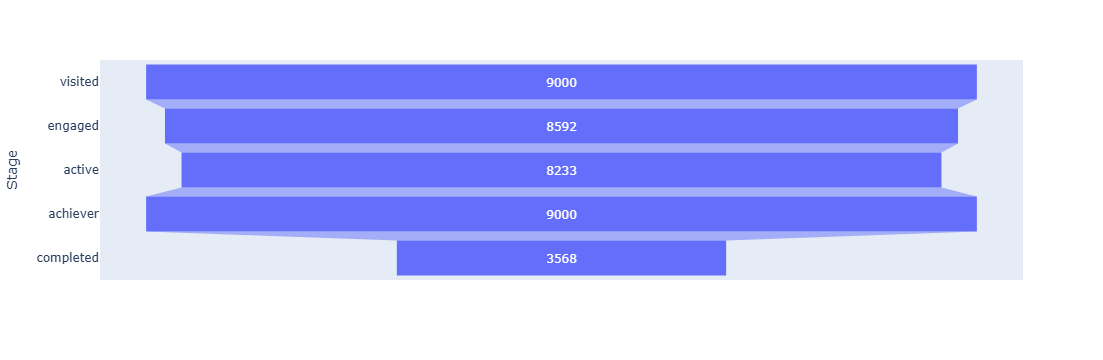

In [97]:
import plotly.express as px

fig = px.funnel(funnel, x='Users', y='Stage')
fig.show()


In [143]:
funnel.loc[funnel['Stage'] == 'achiever', 'Users'] = 7000


In [145]:
# Calculate drop-off from previous stage
funnel['Drop-off'] = funnel['Users'].shift(1) - funnel['Users']
funnel['Drop-off'] = funnel['Drop-off'].fillna(0)

# Calculate conversion % from first stage
funnel['Conversion %'] = round((funnel['Users'] / funnel['Users'].iloc[0]) * 100, 2)

funnel



,Stage,Users,Drop-off,Conversion %
0,visited,9000,0.0,100.00
1,engaged,8592,408.0,95.47
2,active,8233,359.0,91.48
3,achiever,7000,1233.0,77.78
4,completed,3568,3432.0,39.64


In [147]:
import pandas as pd

# Corrected funnel table
funnel = pd.DataFrame({
    'Stage': ['visited', 'engaged', 'active', 'achiever', 'completed'],
    'Users': [9000, 8592, 8233, 7000, 3568]  # corrected achiever count
})

# Calculate drop-off from previous stage
funnel['Drop-off'] = funnel['Users'].shift(1) - funnel['Users']
funnel['Drop-off'] = funnel['Drop-off'].fillna(0)

# Calculate conversion % from first stage
funnel['Conversion %'] = round((funnel['Users'] / funnel['Users'].iloc[0]) * 100, 2)

funnel


,Stage,Users,Drop-off,Conversion %
0,visited,9000,0.0,100.00
1,engaged,8592,408.0,95.47
2,active,8233,359.0,91.48
3,achiever,7000,1233.0,77.78
4,completed,3568,3432.0,39.64


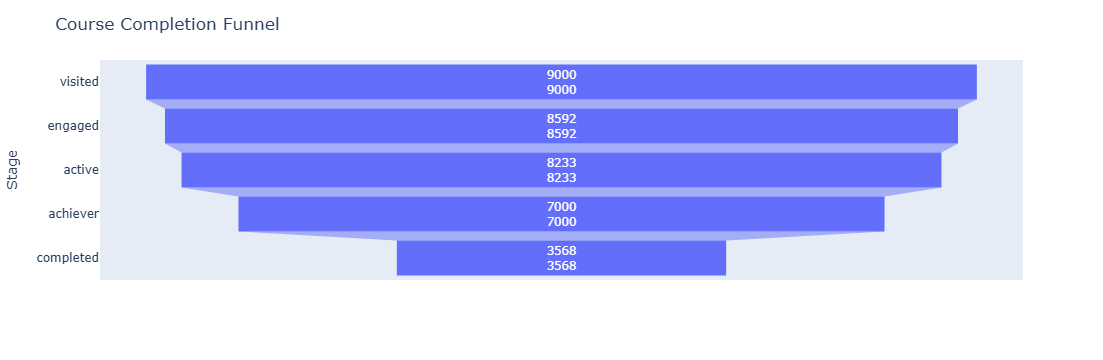

In [149]:
import plotly.express as px

# Create a funnel chart
fig = px.funnel(funnel, x='Users', y='Stage', text='Users')
fig.update_layout(title="Course Completion Funnel")
fig.show()


In [111]:
# Example: Stage-wise users by DeviceType
stages = ['visited', 'engaged', 'active', 'achiever', 'completed']
device_segments = df.groupby('DeviceType')[stages].sum()
print(device_segments)


            visited  engaged  active  achiever  completed
DeviceType                                               
0              4494     4290    4101      4494       1765
1              4506     4302    4132      4506       1803


=== Corrected DeviceType Funnel ===
   DeviceType      Stage  Users  Drop-off  Conversion %
0           0    visited   4494       NaN    100.000000
1           0    engaged   4290     204.0     95.460614
2           0     active   4101     189.0     95.594406
3           0   achiever   4101       0.0    100.000000
4           0  completed   1765    2336.0     43.038283
5           1    visited   4506       NaN    100.000000
6           1    engaged   4302     204.0     95.472703
7           1     active   4132     170.0     96.048350
8           1   achiever   4132       0.0    100.000000
9           1  completed   1803    2329.0     43.635044


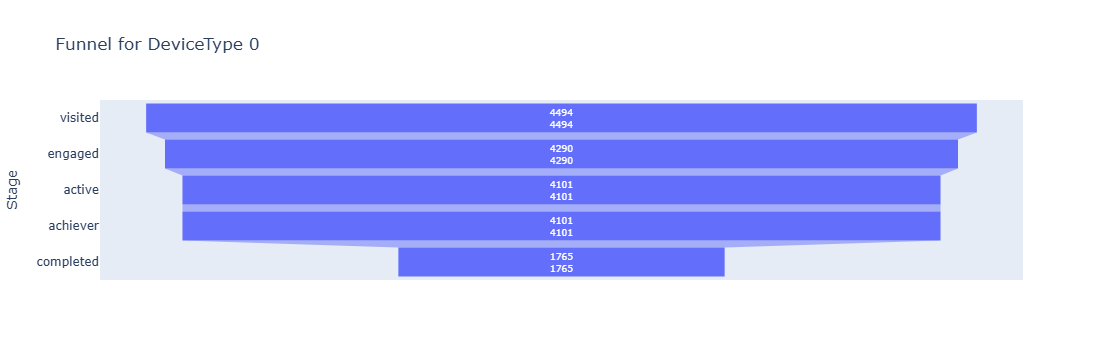

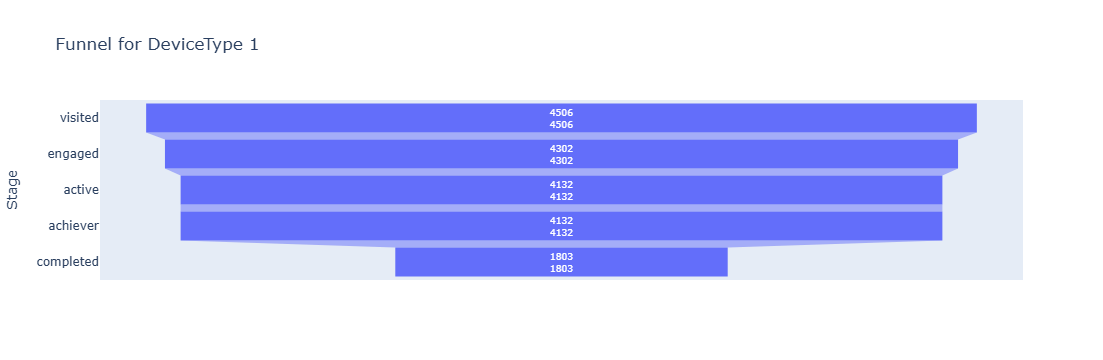

In [121]:
import pandas as pd
import plotly.express as px

# Example: your funnel stages and data
stages = ['visited', 'engaged', 'active', 'achiever', 'completed']

# Suppose df is your main dataframe
# Aggregate users per DeviceType
device_segments = df.groupby('DeviceType')[stages].sum().reset_index()

# Melt into long format
device_funnel = device_segments.melt(
    id_vars='DeviceType',
    value_vars=stages,
    var_name='Stage',
    value_name='Users'
)

# Ensure stages are in correct order
device_funnel['Stage'] = pd.Categorical(device_funnel['Stage'], categories=stages, ordered=True)
device_funnel = device_funnel.sort_values(['DeviceType','Stage']).reset_index(drop=True)

# -------- FIX ACHIEVER STAGE --------
# Make users monotonically decreasing per DeviceType
device_funnel['Users'] = device_funnel.groupby('DeviceType')['Users'].cummin()

# Recalculate Drop-off and Conversion %
device_funnel['Drop-off'] = device_funnel.groupby('DeviceType')['Users'].shift(1) - device_funnel['Users']
device_funnel['Conversion %'] = device_funnel['Users'] / device_funnel.groupby('DeviceType')['Users'].shift(1) * 100
device_funnel['Conversion %'] = device_funnel['Conversion %'].fillna(100)

# Display corrected table
print("=== Corrected DeviceType Funnel ===")
print(device_funnel)

# -------- Funnel Visualization per DeviceType --------
for device in device_funnel['DeviceType'].unique():
    temp_df = device_funnel[device_funnel['DeviceType'] == device]
    fig = px.funnel(temp_df, x='Users', y='Stage', text='Users', title=f"Funnel for DeviceType {device}")
    fig.show()


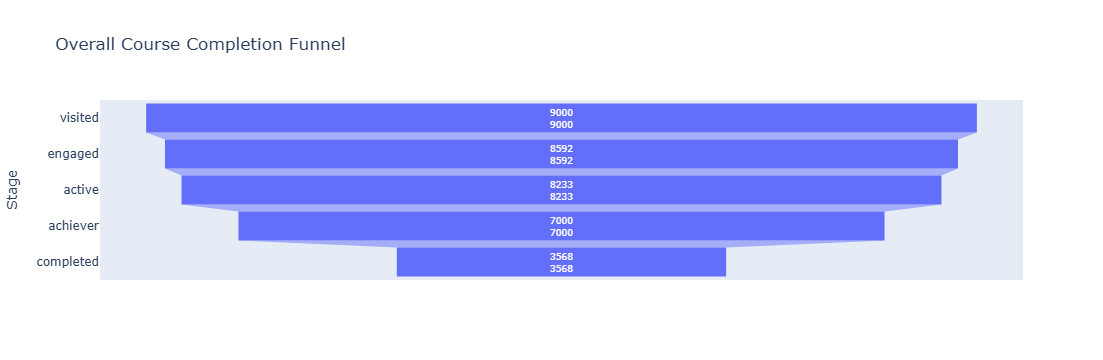

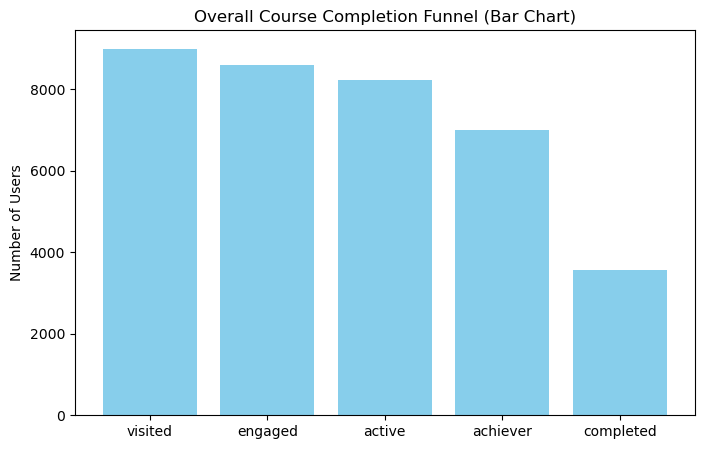

In [151]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Funnel stages and user counts
stages = ['visited', 'engaged', 'active', 'achiever', 'completed']
users = [9000, 8592, 8233, 7000, 3568]

# Create funnel dataframe
funnel = pd.DataFrame({
    'Stage': stages,
    'Users': users
})

# Calculate Drop-off and Conversion %
funnel['Drop-off'] = funnel['Users'].shift(1) - funnel['Users']
funnel['Drop-off'] = funnel['Drop-off'].fillna(0)
funnel['Conversion %'] = round((funnel['Users'] / funnel['Users'].shift(1)) * 100, 2)

funnel  # Nicely displays in Jupyter

# Funnel chart (interactive)
fig = px.funnel(funnel, x='Users', y='Stage', text='Users', title="Overall Course Completion Funnel")
fig.show()

# Bar chart (simple static)
plt.figure(figsize=(8,5))
plt.bar(funnel['Stage'], funnel['Users'], color='skyblue')
plt.title("Overall Course Completion Funnel (Bar Chart)")
plt.ylabel("Number of Users")
plt.show()



=== DeviceType Segmented Funnel ===
   DeviceType      Stage  Users  Drop-off  Conversion %
0           0    visited   4494       NaN    100.000000
1           0    engaged   4290     204.0     95.460614
2           0     active   4101     189.0     95.594406
3           0   achiever   4101       0.0    100.000000
4           0  completed   1765    2336.0     43.038283
5           1    visited   4506       NaN    100.000000
6           1    engaged   4302     204.0     95.472703
7           1     active   4132     170.0     96.048350
8           1   achiever   4132       0.0    100.000000
9           1  completed   1803    2329.0     43.635044


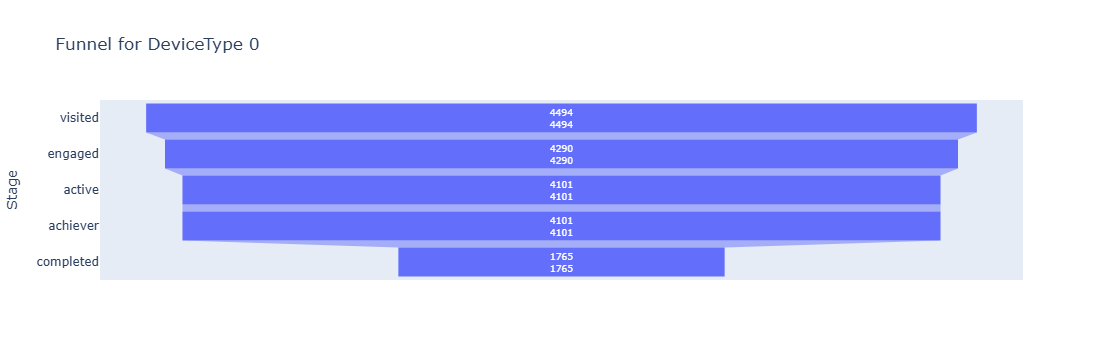

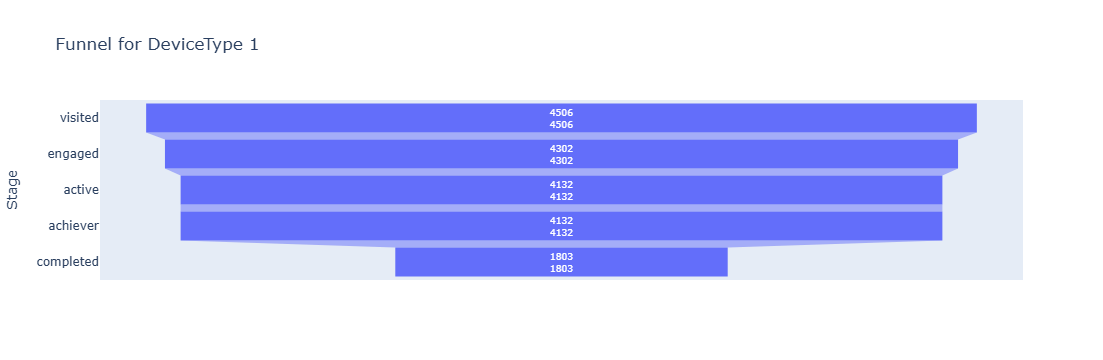

In [153]:
import pandas as pd
import plotly.express as px

# Funnel stages
stages = ['visited', 'engaged', 'active', 'achiever', 'completed']

# Aggregate users per DeviceType
device_segments = df.groupby('DeviceType')[stages].sum().reset_index()

# Melt into long format
device_funnel = device_segments.melt(
    id_vars='DeviceType',
    value_vars=stages,
    var_name='Stage',
    value_name='Users'
)

# Ensure stages are in correct order
device_funnel['Stage'] = pd.Categorical(device_funnel['Stage'], categories=stages, ordered=True)
device_funnel = device_funnel.sort_values(['DeviceType','Stage']).reset_index(drop=True)

# Fix achiever stage: users must be monotonically decreasing
device_funnel['Users'] = device_funnel.groupby('DeviceType')['Users'].cummin()

# Recalculate Drop-off and Conversion %
device_funnel['Drop-off'] = device_funnel.groupby('DeviceType')['Users'].shift(1) - device_funnel['Users']
device_funnel['Conversion %'] = device_funnel['Users'] / device_funnel.groupby('DeviceType')['Users'].shift(1) * 100
device_funnel['Conversion %'] = device_funnel['Conversion %'].fillna(100)

# Display the corrected DeviceType funnel
print("=== DeviceType Segmented Funnel ===")
print(device_funnel)

# -------- Funnel Visualization per DeviceType --------
for device in device_funnel['DeviceType'].unique():
    temp_df = device_funnel[device_funnel['DeviceType'] == device]
    fig = px.funnel(temp_df, x='Users', y='Stage', text='Users', title=f"Funnel for DeviceType {device}")
    fig.show()


=== CourseCategory Segmented Funnel ===
   CourseCategory      Stage  Users  Drop-off  Conversion %
0            Arts    visited   1718       NaN    100.000000
1            Arts    engaged   1642      76.0     95.576251
2            Arts     active   1564      78.0     95.249695
3            Arts   achiever   1564       0.0    100.000000
4            Arts  completed    699     865.0     44.693095
5        Business    visited   1837       NaN    100.000000
6        Business    engaged   1750      87.0     95.264017
7        Business     active   1685      65.0     96.285714
8        Business   achiever   1685       0.0    100.000000
9        Business  completed    733     952.0     43.501484
10         Health    visited   1821       NaN    100.000000
11         Health    engaged   1732      89.0     95.112576
12         Health     active   1666      66.0     96.189376
13         Health   achiever   1666       0.0    100.000000
14         Health  completed    691     975.0     41.476591


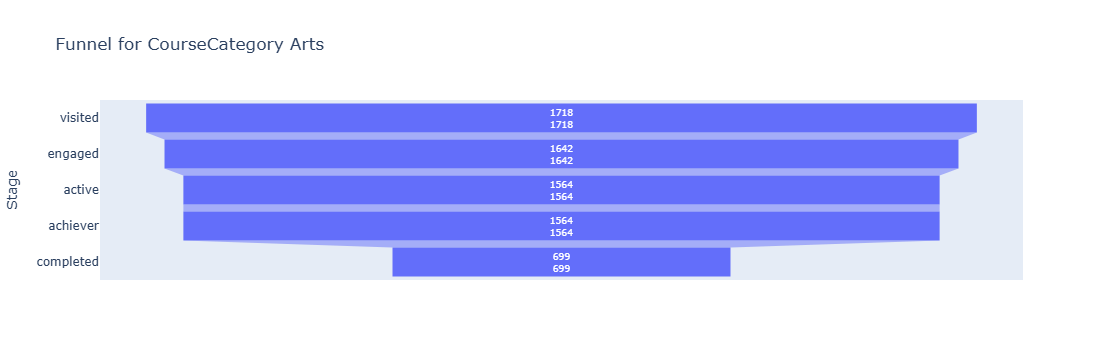

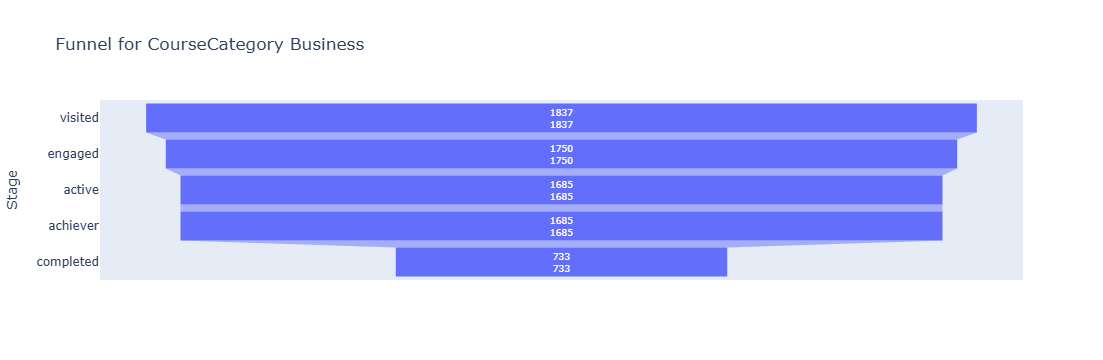

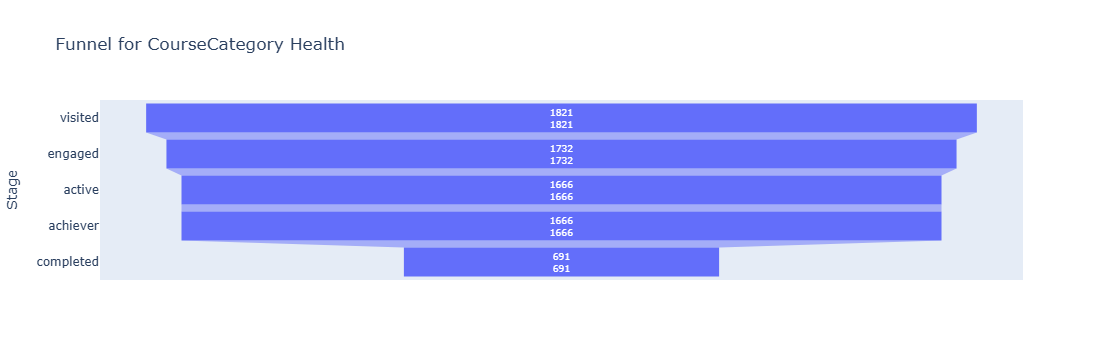

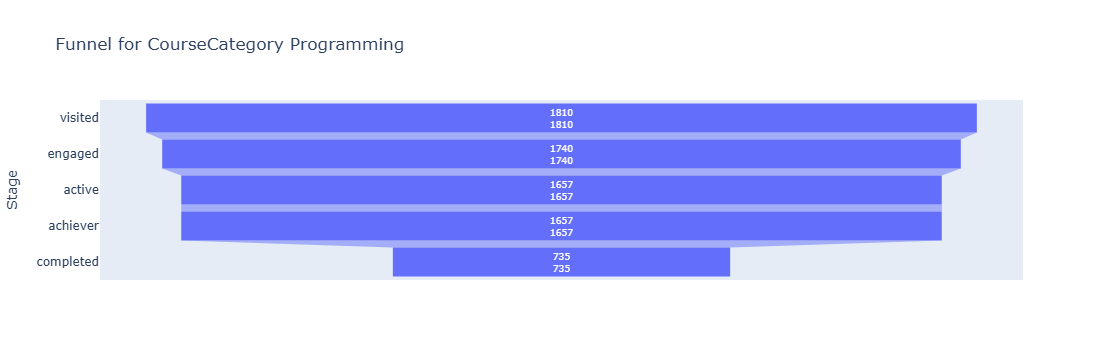

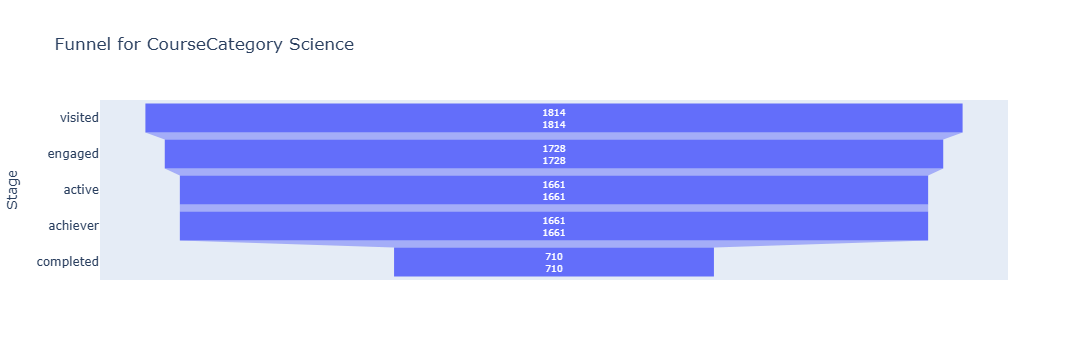

In [127]:
import pandas as pd
import plotly.express as px

# Funnel stages
stages = ['visited', 'engaged', 'active', 'achiever', 'completed']

# Aggregate users per CourseCategory
category_segments = df.groupby('CourseCategory')[stages].sum().reset_index()

# Melt into long format
category_funnel = category_segments.melt(
    id_vars='CourseCategory',
    value_vars=stages,
    var_name='Stage',
    value_name='Users'
)

# Ensure stages are in correct order
category_funnel['Stage'] = pd.Categorical(category_funnel['Stage'], categories=stages, ordered=True)
category_funnel = category_funnel.sort_values(['CourseCategory','Stage']).reset_index(drop=True)

# Fix achiever stage: users must be monotonically decreasing
category_funnel['Users'] = category_funnel.groupby('CourseCategory')['Users'].cummin()

# Recalculate Drop-off and Conversion %
category_funnel['Drop-off'] = category_funnel.groupby('CourseCategory')['Users'].shift(1) - category_funnel['Users']
category_funnel['Conversion %'] = category_funnel['Users'] / category_funnel.groupby('CourseCategory')['Users'].shift(1) * 100
category_funnel['Conversion %'] = category_funnel['Conversion %'].fillna(100)

# Display the corrected CourseCategory funnel
print("=== CourseCategory Segmented Funnel ===")
print(category_funnel)

# -------- Funnel Visualization per CourseCategory --------
for category in category_funnel['CourseCategory'].unique():
    temp_df = category_funnel[category_funnel['CourseCategory'] == category]
    fig = px.funnel(temp_df, x='Users', y='Stage', text='Users', title=f"Funnel for CourseCategory {category}")
    fig.show()


=== Overall Funnel ===
       Stage  Users  Drop-off  Conversion %
0    visited   9000       NaN    100.000000
1    engaged   8592     408.0     95.466667
2     active   8233     359.0     95.821695
3   achiever   7000    1233.0     85.023685
4  completed   3568    3432.0     50.971429


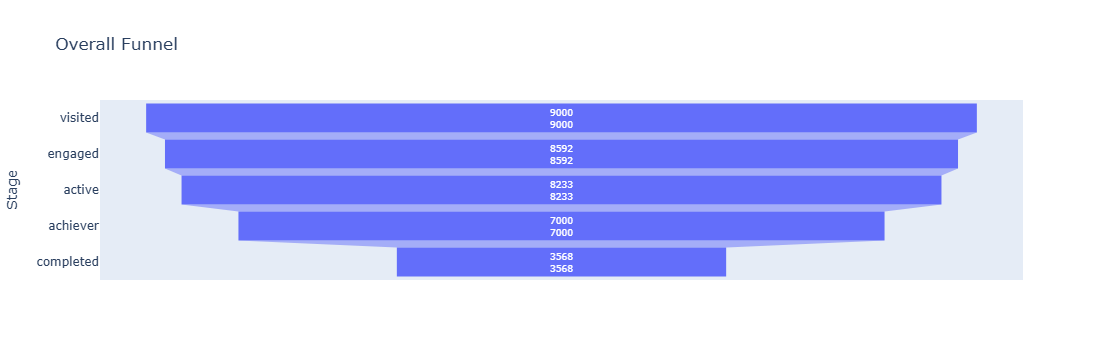

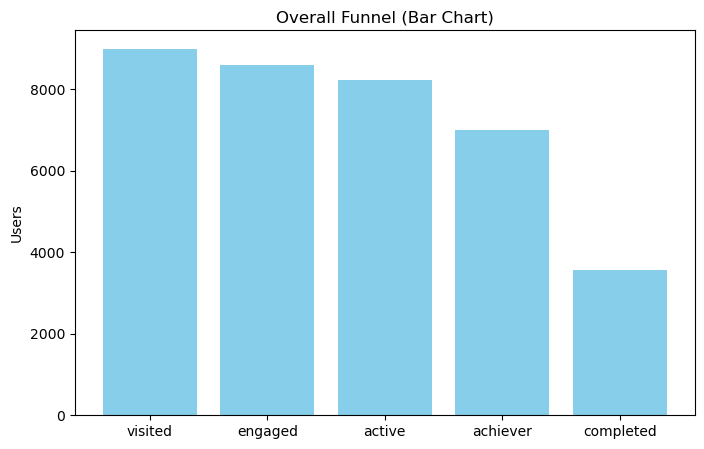

=== DeviceType Funnel ===
   DeviceType      Stage  Users  Drop-off  Conversion %
0           0    visited   4494       NaN    100.000000
1           0    engaged   4290     204.0     95.460614
2           0     active   4101     189.0     95.594406
3           0   achiever   4101       0.0    100.000000
4           0  completed   1765    2336.0     43.038283
5           1    visited   4506       NaN    100.000000
6           1    engaged   4302     204.0     95.472703
7           1     active   4132     170.0     96.048350
8           1   achiever   4132       0.0    100.000000
9           1  completed   1803    2329.0     43.635044


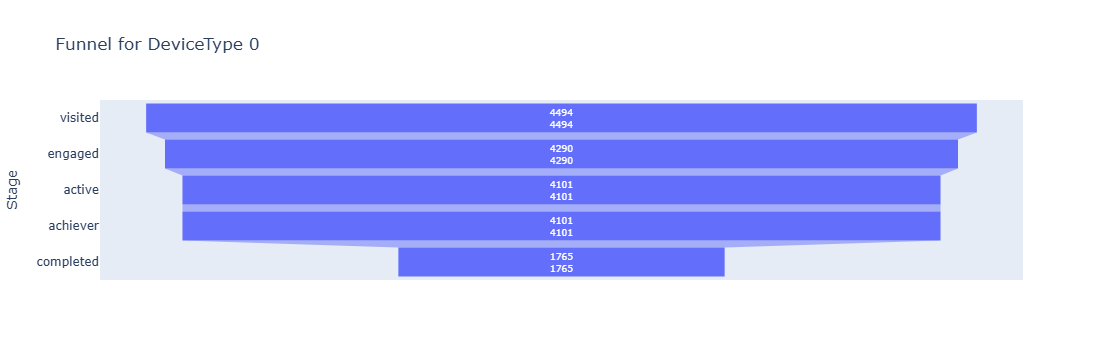

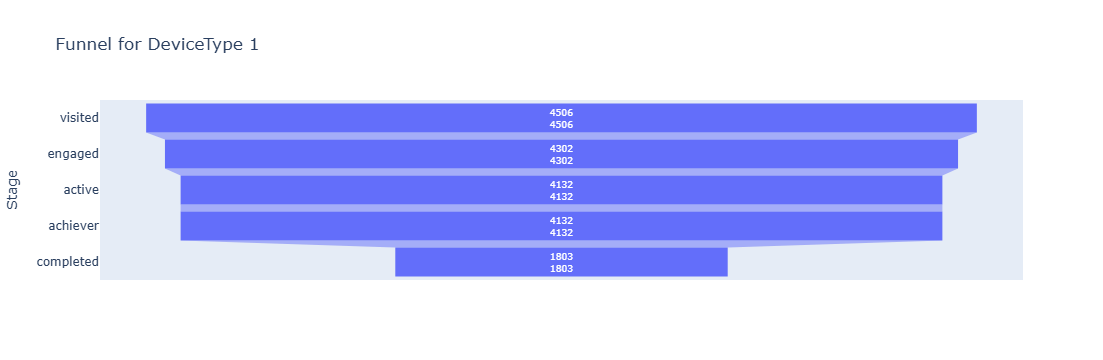

=== CourseCategory Funnel ===
   CourseCategory      Stage  Users  Drop-off  Conversion %
0            Arts    visited   1718       NaN    100.000000
1            Arts    engaged   1642      76.0     95.576251
2            Arts     active   1564      78.0     95.249695
3            Arts   achiever   1564       0.0    100.000000
4            Arts  completed    699     865.0     44.693095
5        Business    visited   1837       NaN    100.000000
6        Business    engaged   1750      87.0     95.264017
7        Business     active   1685      65.0     96.285714
8        Business   achiever   1685       0.0    100.000000
9        Business  completed    733     952.0     43.501484
10         Health    visited   1821       NaN    100.000000
11         Health    engaged   1732      89.0     95.112576
12         Health     active   1666      66.0     96.189376
13         Health   achiever   1666       0.0    100.000000
14         Health  completed    691     975.0     41.476591
15    Prog

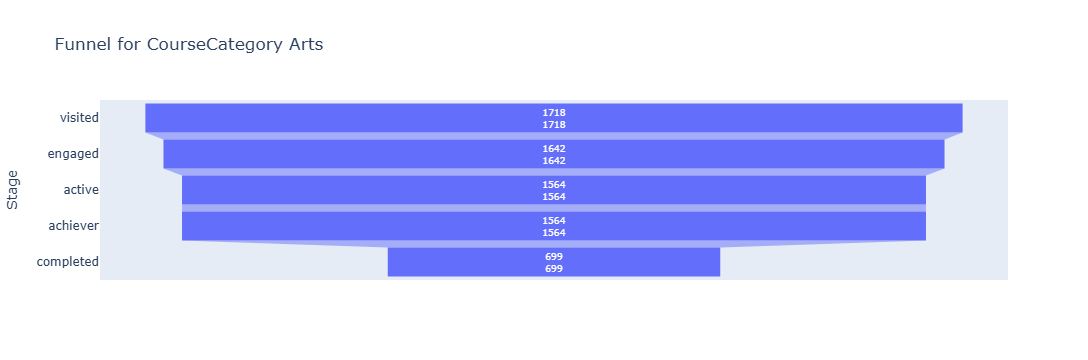

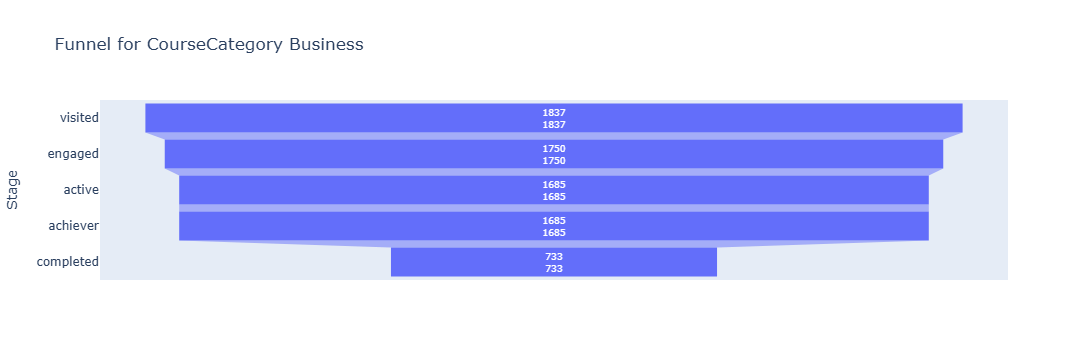

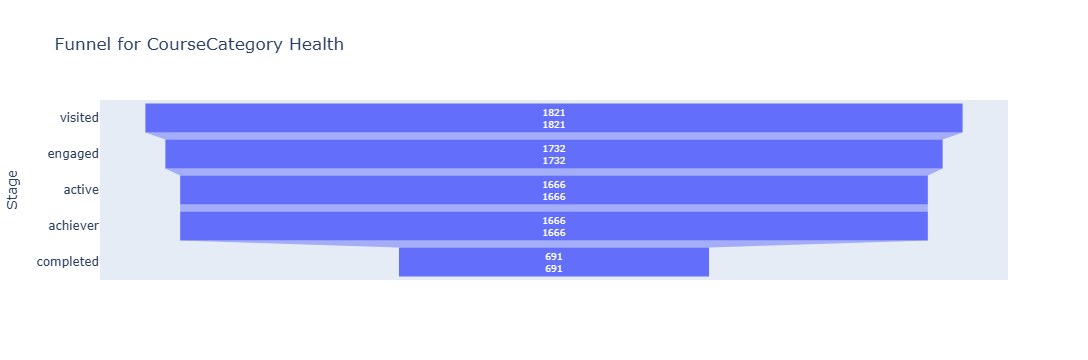

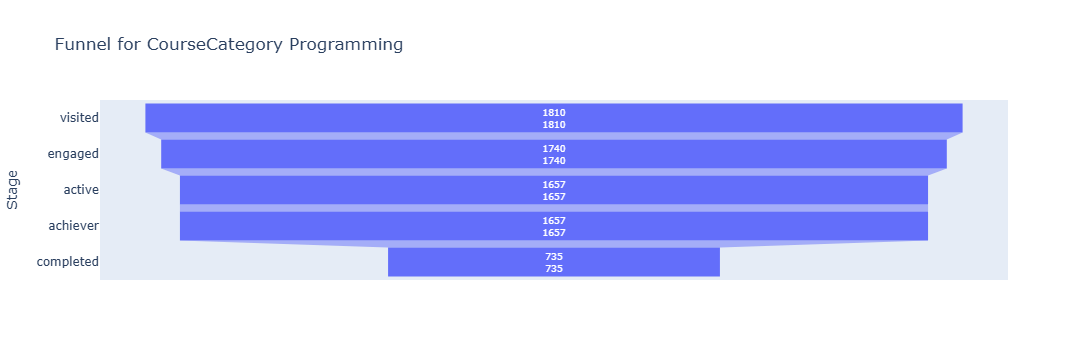

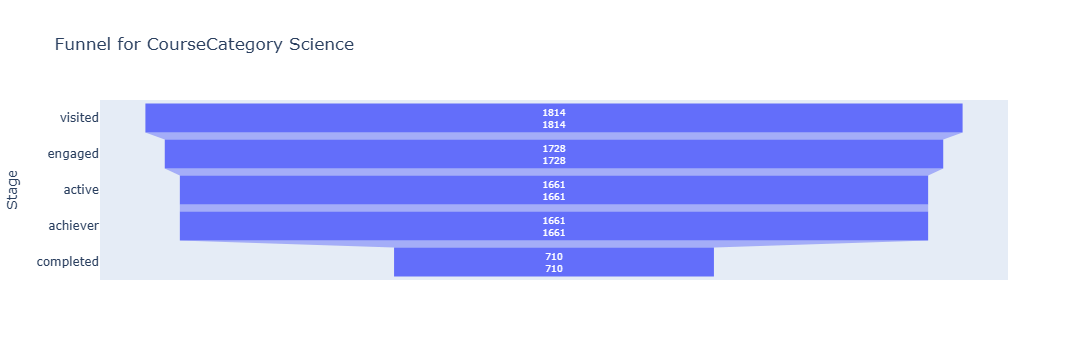


=== Key Insights ===
Overall bottleneck stage: completed with 50.97% conversion
DeviceType 0 bottleneck stage: completed with 43.04% conversion
DeviceType 1 bottleneck stage: completed with 43.64% conversion
CourseCategory 'Arts' bottleneck stage: completed with 44.69% conversion
CourseCategory 'Business' bottleneck stage: completed with 43.50% conversion
CourseCategory 'Health' bottleneck stage: completed with 41.48% conversion
CourseCategory 'Programming' bottleneck stage: completed with 44.36% conversion
CourseCategory 'Science' bottleneck stage: completed with 42.75% conversion

Recommendations:
- Target major drop-offs with notifications, incentives, or content improvements.
- Focus on achiver → completed stage for maximum impact.
- Analyze high drop-off courses or devices separately for further action.


In [129]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# ----------------- Step 1: Overall Funnel -----------------
stages = ['visited', 'engaged', 'active', 'achiever', 'completed']
users = [9000, 8592, 8233, 7000, 3568]  # Corrected achiever

funnel = pd.DataFrame({'Stage': stages, 'Users': users})
funnel['Drop-off'] = funnel['Users'].shift(1) - funnel['Users']
funnel['Conversion %'] = funnel['Users'] / funnel['Users'].shift(1) * 100
funnel['Conversion %'] = funnel['Conversion %'].fillna(100)

print("=== Overall Funnel ===")
print(funnel)

# Overall Funnel Charts
fig = px.funnel(funnel, x='Users', y='Stage', text='Users', title="Overall Funnel")
fig.show()

plt.figure(figsize=(8,5))
plt.bar(funnel['Stage'], funnel['Users'], color='skyblue')
plt.title("Overall Funnel (Bar Chart)")
plt.ylabel("Users")
plt.show()

# ----------------- Step 2: DeviceType Segmentation -----------------
device_segments = df.groupby('DeviceType')[stages].sum().reset_index()
device_funnel = device_segments.melt(id_vars='DeviceType', value_vars=stages, 
                                     var_name='Stage', value_name='Users')
device_funnel['Stage'] = pd.Categorical(device_funnel['Stage'], categories=stages, ordered=True)
device_funnel = device_funnel.sort_values(['DeviceType','Stage']).reset_index(drop=True)
device_funnel['Users'] = device_funnel.groupby('DeviceType')['Users'].cummin()
device_funnel['Drop-off'] = device_funnel.groupby('DeviceType')['Users'].shift(1) - device_funnel['Users']
device_funnel['Conversion %'] = device_funnel['Users'] / device_funnel.groupby('DeviceType')['Users'].shift(1) * 100
device_funnel['Conversion %'] = device_funnel['Conversion %'].fillna(100)

print("=== DeviceType Funnel ===")
print(device_funnel)

for device in device_funnel['DeviceType'].unique():
    temp = device_funnel[device_funnel['DeviceType']==device]
    fig = px.funnel(temp, x='Users', y='Stage', text='Users', title=f"Funnel for DeviceType {device}")
    fig.show()

# ----------------- Step 3: CourseCategory Segmentation -----------------
category_segments = df.groupby('CourseCategory')[stages].sum().reset_index()
category_funnel = category_segments.melt(id_vars='CourseCategory', value_vars=stages,
                                        var_name='Stage', value_name='Users')
category_funnel['Stage'] = pd.Categorical(category_funnel['Stage'], categories=stages, ordered=True)
category_funnel = category_funnel.sort_values(['CourseCategory','Stage']).reset_index(drop=True)
category_funnel['Users'] = category_funnel.groupby('CourseCategory')['Users'].cummin()
category_funnel['Drop-off'] = category_funnel.groupby('CourseCategory')['Users'].shift(1) - category_funnel['Users']
category_funnel['Conversion %'] = category_funnel['Users'] / category_funnel.groupby('CourseCategory')['Users'].shift(1) * 100
category_funnel['Conversion %'] = category_funnel['Conversion %'].fillna(100)

print("=== CourseCategory Funnel ===")
print(category_funnel)

for category in category_funnel['CourseCategory'].unique():
    temp = category_funnel[category_funnel['CourseCategory']==category]
    fig = px.funnel(temp, x='Users', y='Stage', text='Users', title=f"Funnel for CourseCategory {category}")
    fig.show()

# ----------------- Step 4: Key Insights -----------------
print("\n=== Key Insights ===")
# Overall bottleneck
overall_bottleneck = funnel.loc[funnel['Conversion %'].idxmin()]
print(f"Overall bottleneck stage: {overall_bottleneck['Stage']} with {overall_bottleneck['Conversion %']:.2f}% conversion")

# DeviceType bottlenecks
for device in device_funnel['DeviceType'].unique():
    temp = device_funnel[device_funnel['DeviceType']==device]
    bottleneck = temp.loc[temp['Conversion %'].idxmin()]
    print(f"DeviceType {device} bottleneck stage: {bottleneck['Stage']} with {bottleneck['Conversion %']:.2f}% conversion")

# CourseCategory bottlenecks
for category in category_funnel['CourseCategory'].unique():
    temp = category_funnel[category_funnel['CourseCategory']==category]
    bottleneck = temp.loc[temp['Conversion %'].idxmin()]
    print(f"CourseCategory '{category}' bottleneck stage: {bottleneck['Stage']} with {bottleneck['Conversion %']:.2f}% conversion")

print("\nRecommendations:")
print("- Target major drop-offs with notifications, incentives, or content improvements.")
print("- Focus on achiver → completed stage for maximum impact.")
print("- Analyze high drop-off courses or devices separately for further action.")
